# Analyzing Portfolio Risk and Return

We are tasked with evaluating four new investment options for inclusion in the client portfolios. Legendary fund and hedge-fund managers run all four selections.  We need to determine the fund with the most investment potential based on key risk-management metrics: the daily returns, standard deviations, Sharpe ratios, and betas.  We will execute on this via the following:


### Import the Data

Use the ``risk_return_analysis.ipynb`` file to complete the following steps:

1. Import the required libraries and dependencies.

2. Use the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame. Be sure to create a `DateTimeIndex`. Reviews the first five rows of the DataFrame by using the `head` function.

3. Use the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Bases this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Review the first five rows of the daily returns DataFrame.

### Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents. To do so, complete the following steps:

1. Use the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Review the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

3. Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots. To do so, complete the following steps:

1. Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

2. Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

3. Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta. To do so, complete the following steps:

1. Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

2. Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

3. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

5. Answer the following three questions:

* Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

* Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

* Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio. To do so, complete the following steps:

1. Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

2. Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

3. Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

4. Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

#### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options. To start your analysis, complete the following step:

* Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

Next, for each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

Finally, answer the following two questions:

* Which of the two portfolios seem more sensitive to movements in the S&P 500?

* Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?


### Import the Data

#### Step 1: Imports the required libraries and dependencies.

In [24]:
# Imports the required libraries and dependencies
import pandas as pd
import numpy as np
from pathlib import Path
%matplotlib inline

#### Step 2: Uses the `read_csv` function and the `Path` module to read the `whale_navs.csv` file into a Pandas DataFrame.  Reviews the first five rows of the DataFrame by using the `head` function.

In [6]:
# Imports the data by reading in the CSV file and setting the DatetimeIndex 
whale_df = pd.read_csv(
    Path("./Resources/whale_navs.csv"),
    index_col="date",
    parse_dates=True,
    infer_datetime_format=True)

# Reviews the first 5 rows of the DataFrame
whale_df.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-01,31.950240,14.991826,59.977830,51.948712,194.35
2014-10-02,31.936110,14.994072,59.978626,51.957619,194.38
2014-10-03,31.969707,14.999596,60.002264,52.022484,196.52
2014-10-06,32.048215,14.999471,60.006244,52.036387,196.29
2014-10-07,31.964216,14.994720,59.993735,52.005864,193.26


#### Step 3: Uses the Pandas `pct_change` function together with `dropna` to create the daily returns DataFrame. Bases this DataFrame on the NAV prices of the four portfolios and on the closing price of the S&P 500 Index. Reviews the first five rows of the daily returns DataFrame.

In [7]:
# Prepares for the analysis by converting the dataframe of NAVs and prices to daily returns
# Drops any rows with all missing values
whale_daily_return = whale_df.pct_change().dropna()

# Reviews the first five rows of the daily returns DataFrame.
whale_daily_return.head()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2014-10-02,-0.000442,0.000150,0.000013,0.000171,0.000154
2014-10-03,0.001052,0.000368,0.000394,0.001248,0.011009
2014-10-06,0.002456,-0.000008,0.000066,0.000267,-0.001170
2014-10-07,-0.002621,-0.000317,-0.000208,-0.000587,-0.015436
2014-10-08,0.000390,0.000369,0.000242,0.000842,0.017489


---

## Quantitative Analysis

The analysis has several components: performance, volatility, risk, risk-return profile, and portfolio diversification.

###  Analyze the Performance

Analyze the data to determine if any of the portfolios outperform the broader stock market, which the S&P 500 represents.

#### Step 1:  Uses the default Pandas `plot` function to visualize the daily return data of the four fund portfolios and the S&P 500. Includes the `title` parameter, and adjusts the figure size.

<AxesSubplot:title={'center':'Daily Returns for Whale Funds & S&P 500'}, xlabel='date', ylabel='Daily Returns'>

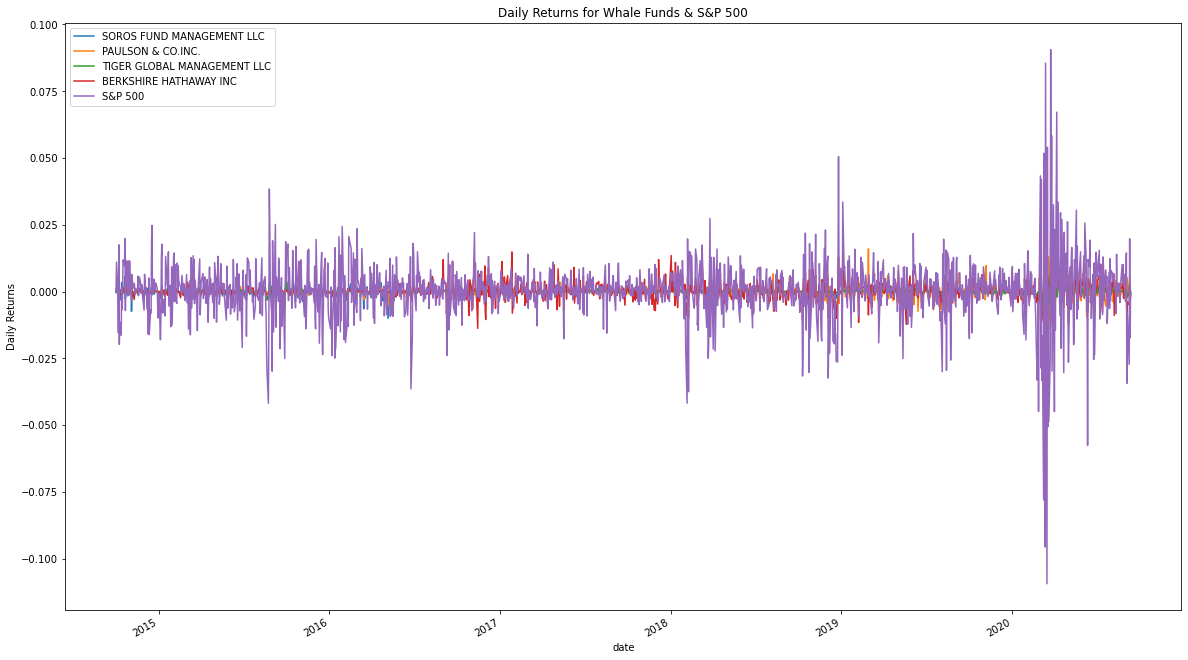

In [12]:
# Plots the daily return data of the 4 funds and the S&P 500 
# Inclues a title parameter and adjusts the figure size
whale_daily_return.plot(title="Daily Returns for Whale Funds & S&P 500", figsize=(20,12), legend=True, ylabel="Daily Returns")

#### Step 2: Uses the Pandas `cumprod` function to calculate the cumulative returns for the four fund portfolios and the S&P 500. Reviews the last five rows of the cumulative returns DataFrame by using the Pandas `tail` function.

In [15]:
# Calculates and plots the cumulative returns of the 4 fund portfolios and the S&P 500
whale_cumulative_return = (1+whale_daily_return).cumprod()
# Reviews the last 5 rows of the cumulative returns DataFrame
whale_cumulative_return.tail()

,SOROS FUND MANAGEMENT LLC,PAULSON & CO.INC.,TIGER GLOBAL MANAGEMENT LLC,BERKSHIRE HATHAWAY INC,S&P 500
date,,,,,
2020-09-04,0.987355,0.958187,1.055714,1.244856,1.762645
2020-09-08,0.985640,0.956378,1.054373,1.238608,1.714484
2020-09-09,0.986739,0.958409,1.057221,1.240858,1.748341
2020-09-10,0.985498,0.959740,1.055539,1.237883,1.717983
2020-09-11,0.985086,0.957887,1.055081,1.236625,1.718858


#### Step 3: Use the default Pandas `plot` to visualize the cumulative return values for the four funds and the S&P 500 over time. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Cumulative Returns for Whale Funds & S&P 500'}, xlabel='date', ylabel='Cumulative Returns'>

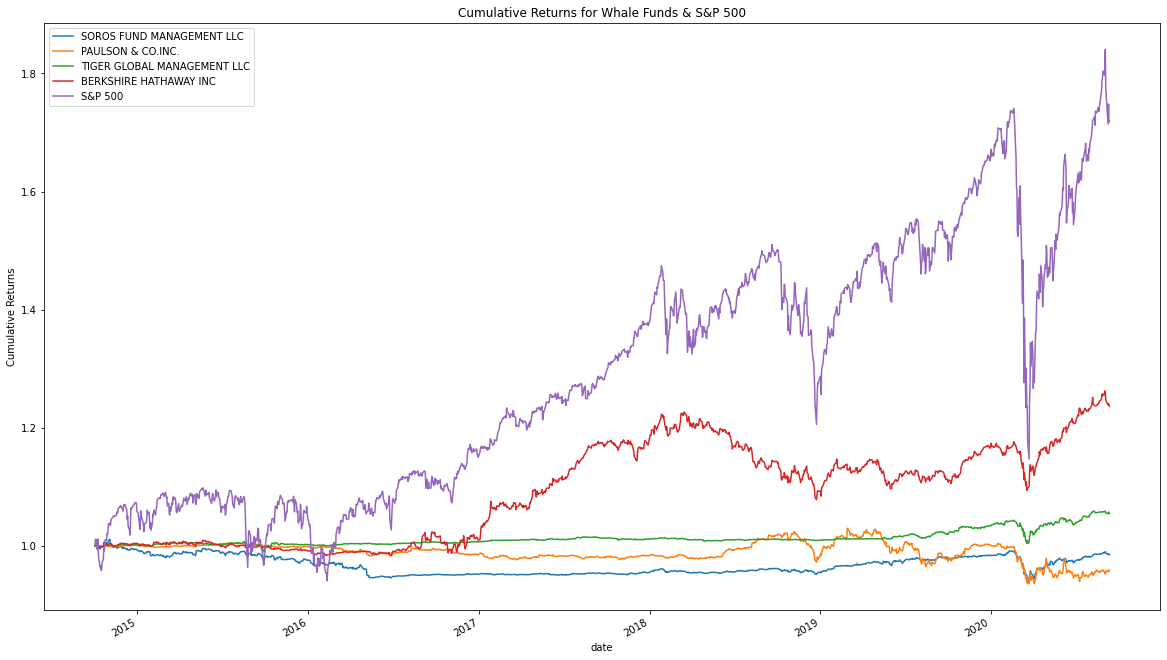

In [16]:
# Visualizes the cumulative returns using the Pandas plot function
# Includes a title parameter and adjust the figure size
whale_cumulative_return.plot(title="Cumulative Returns for Whale Funds & S&P 500", figsize=(20,12), legend=True, ylabel="Cumulative Returns")

#### Step 4: Answer the following question: Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

Based on the cumulative return data and the visualization, do any of the four fund portfolios outperform the S&P 500 Index?

When comparing the cumulative return data of the four fund portfolios and the S&P 500, the line chart shows that none of the four fund porfolios outperform the S&P 500 Index.  According to purely the return metric, the S&P 500 Index is the clear choice.

---

### Analyze the Volatility

Analyze the volatility of each of the four fund portfolios and of the S&P 500 Index by using box plots.

#### Step 1: Use the Pandas `plot` function and the `kind="box"` parameter to visualize the daily return data for each of the four portfolios and for the S&P 500 in a box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns for Whale Funds & S&P 500 - Boxplot'}, ylabel='Daily Returns'>

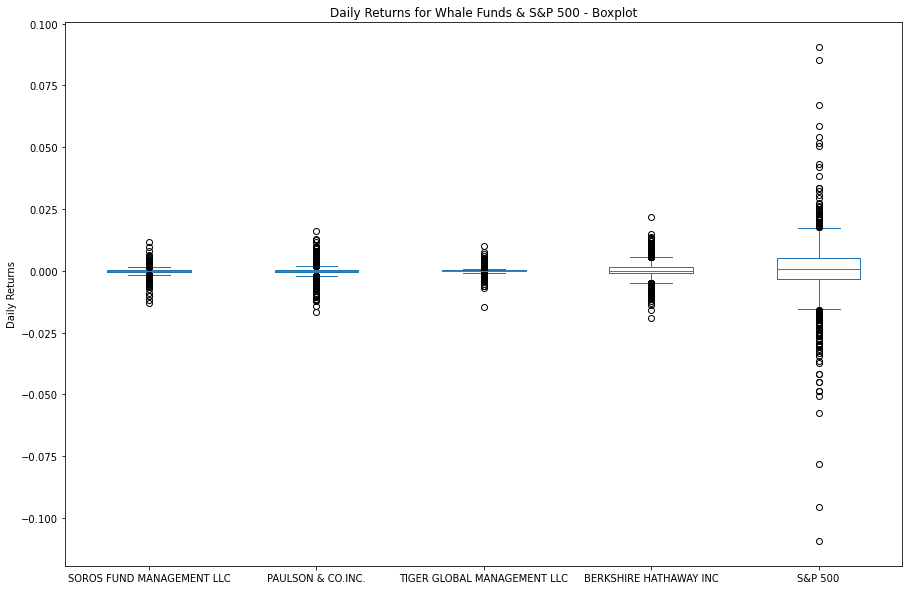

In [17]:
# Uses the daily return data to create box plots to visualize the volatility of the 4 funds and the S&P 500 
# Includes a title parameter and adjust the figure size
whale_daily_return.plot(kind="box", title="Daily Returns for Whale Funds & S&P 500 - Boxplot", figsize=(15,10), legend=True, ylabel="Daily Returns")

#### Step 2: Use the Pandas `drop` function to create a new DataFrame that contains the data for just the four fund portfolios by dropping the S&P 500 column. Visualize the daily return data for just the four fund portfolios by using another box plot. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Daily Returns for ONLY Whale Funds - Boxplot'}, ylabel='Daily Returns'>

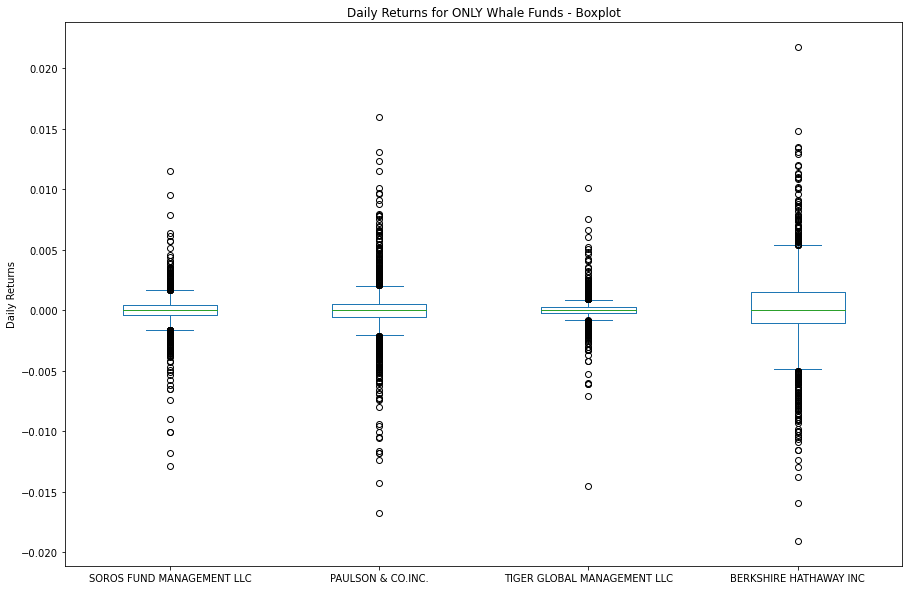

In [20]:
# Creates a new DataFrame containing only the 4 fund portfolios by dropping the S&P 500 column from the DataFrame
just_whale_daily_return = whale_daily_return.drop(["S&P 500"], axis=1)

# Creates box plots to reflect the return data for only the 4 fund portfolios
# Includes a title parameter and adjust the figure size
just_whale_daily_return.plot(kind="box", title="Daily Returns for ONLY Whale Funds - Boxplot", figsize=(15,10), legend=True, ylabel="Daily Returns")

#### Step 3: Answer the following question: Based on the box plot visualization of just the four fund portfolios, which fund was the most volatile (with the greatest spread) and which was the least volatile (with the smallest spread)?

According to the box plot visualizations of the four fund portfolios, Berkshire Hathaway Inc. was the most volatile (with the greatest spread) and Tiger Global Management LLC was the least volatile (with the smallest spread).

---

### Analyze the Risk

Evaluate the risk profile of each portfolio by using the standard deviation and the beta.

#### Step 1: Use the Pandas `std` function to calculate the standard deviation for each of the four portfolios and for the S&P 500. Review the standard deviation calculations, sorted from smallest to largest.

In [23]:
# Calculates and sorts the standard deviation for all 4 portfolios and the S&P 500
whale_std_sorted = whale_daily_return.std().sort_values()

# Reviews the standard deviations sorted smallest to largest
whale_std_sorted

TIGER GLOBAL MANAGEMENT LLC    0.000996
SOROS FUND MANAGEMENT LLC      0.001405
PAULSON & CO.INC.              0.002199
BERKSHIRE HATHAWAY INC         0.003256
S&P 500                        0.011550
dtype: float64

#### Step 2: Calculate the annualized standard deviation for each of the four portfolios and for the S&P 500. To do that, multiply the standard deviation by the square root of the number of trading days. Use 252 for that number.

In [27]:
# Calculates and sorts the annualized standard deviation (252 trading days) of the 4 portfolios and the S&P 500
trading_days = 252
annual_whale_std = whale_daily_return.std() * np.sqrt(trading_days)

# Reviews the annual standard deviations smallest to largest
annual_whale_std.sort_values()

TIGER GLOBAL MANAGEMENT LLC    0.015804
SOROS FUND MANAGEMENT LLC      0.022297
PAULSON & CO.INC.              0.034912
BERKSHIRE HATHAWAY INC         0.051692
S&P 500                        0.183345
dtype: float64

#### Step 3: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of the four fund portfolios and of the S&P 500 index. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation for Whale Funds & S&P 500'}, xlabel='date', ylabel='Rolling Standard Deviation (21-Day)'>

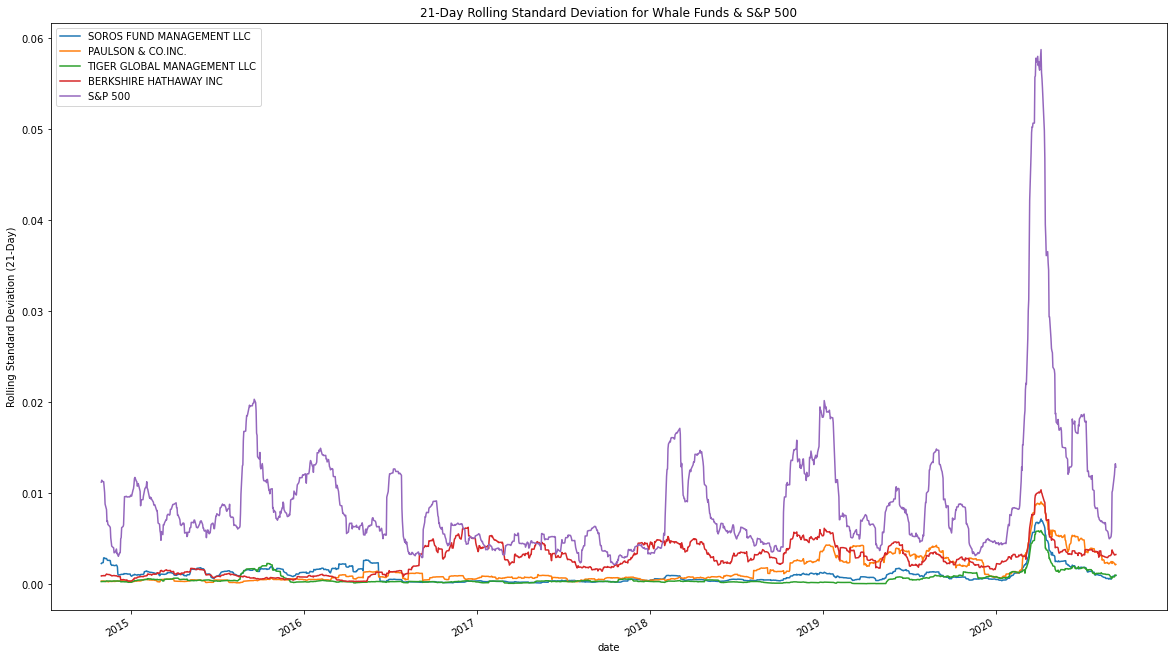

In [29]:
# Using the daily returns DataFrame and a 21-day rolling window, 
# plots the rolling standard deviation of the 4 portfolios and the S&P 500
# Includes a title parameter and adjust the figure size
whale_std_21 = whale_daily_return.rolling(window=21).std()
whale_std_21.plot(title="21-Day Rolling Standard Deviation for Whale Funds & S&P 500", figsize=(20,12), legend=True, ylabel="Rolling Standard Deviation (21-Day)")

#### Step 4: Use the daily returns DataFrame and a 21-day rolling window to plot the rolling standard deviations of only the four fund portfolios. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'21-Day Rolling Standard Deviation for ONLY Whale Funds'}, xlabel='date', ylabel='Rolling Standard Deviation (21-Day)'>

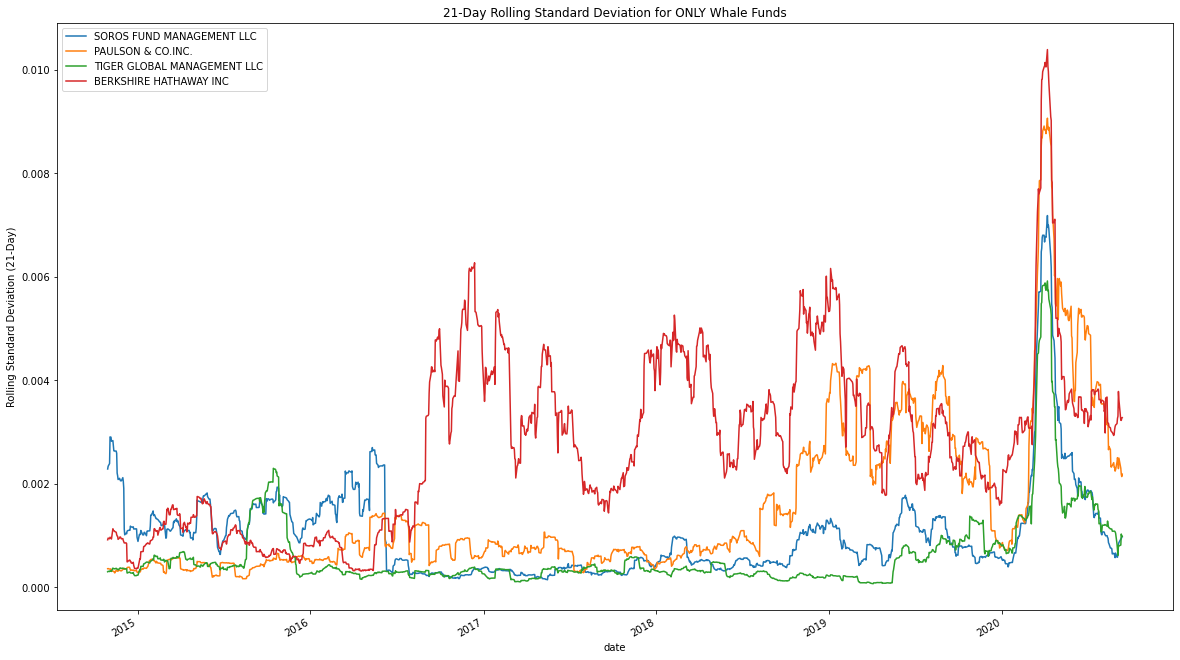

In [30]:
# Using the daily return data and a 21-day rolling window, plots the rolling standard deviation of just the 4 portfolios. 
# Includes a title parameter and adjust the figure size
just_whale_std_21 = just_whale_daily_return.rolling(window=21).std()
just_whale_std_21.plot(title="21-Day Rolling Standard Deviation for ONLY Whale Funds", figsize=(20,12), legend=True, ylabel="Rolling Standard Deviation (21-Day)")

#### Step 5: Answer the following three questions:

1. Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

2. Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

3. Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time?

**Question 1**  Based on the annualized standard deviation, which portfolios pose more risk than the S&P 500?

Based on the annualized standard deviation, none of the whale fund portfolios posed more risk than the S&P 500 Index.  There were several brief periods where Berkshire Hathaway had a greater rolling standard deviation than the S&P 500, however, those periods are very short and the rolling standard deviation was hardly greater.  In general, it is safe to say that the S&P 500 Index was the "riskiest" fund among the funds compared in the analysis, within the time frame analyzed.

**Question 2** Based on the rolling metrics, does the risk of each portfolio increase at the same time that the risk of the S&P 500 increases?

Based on the rolling metrics, there does appear to be a trend showing that the risk of the whale fund portfolios increased alongside the risk in the S&P 500.  Although more analysis could further support or deny this claim, the chart does appear to show a correlation between the risks of the whale fund portfolios and the risk of the S&P 500 Index.


**Question 3** Based on the rolling standard deviations of only the four fund portfolios, which portfolio poses the most risk? Does this change over time? 

According to the rolling standard deviations, Berkshire Hathaway generally poses the most risk to investors.  However, this does appear to change over time, as there are periods within the data set where every whale fund in the dataset had the highest rolling standard deviation at some point in the time frame.  It is clear, however, that all whale funds have a lower rolling standard deviation that the S&P for most of, or the entirety of, the time frame.  

---

### Analyze the Risk-Return Profile

To determine the overall risk of an asset or portfolio, quantitative analysts and investment managers consider not only its risk metrics but also its risk-return profile. After all, if you have two portfolios that each offer a 10% return but one has less risk, you’d probably invest in the smaller-risk portfolio. For this reason, you need to consider the Sharpe ratios for each portfolio.

#### Step 1: Use the daily return DataFrame to calculate the annualized average return data for the four fund portfolios and for the S&P 500. Use 252 for the number of trading days. Review the annualized average returns, sorted from lowest to highest.

In [34]:
# Calculates the annual average return data for the for fund portfolios and the S&P 500
# Uses 252 as the number of trading days in the year
annual_whale_average = whale_daily_return.mean() * np.sqrt(trading_days)

# Reviews the annual average returns sorted from lowest to highest
annual_whale_average.sort_values()

PAULSON & CO.INC.             -0.000418
SOROS FUND MANAGEMENT LLC     -0.000144
TIGER GLOBAL MANAGEMENT LLC    0.000576
BERKSHIRE HATHAWAY INC         0.002336
S&P 500                        0.006810
dtype: float64

#### Step 2: Calculate the Sharpe ratios for the four fund portfolios and for the S&P 500. To do that, divide the annualized average return by the annualized standard deviation for each. Review the resulting Sharpe ratios, sorted from lowest to highest.

In [36]:
# Calculates the annualized Sharpe Ratios for each of the 4 portfolios and the S&P 500.
annualized_sharpe_ratio = annual_whale_average/annual_whale_std

# Reviews the Sharpe ratios sorted lowest to highest
annualized_sharpe_ratio.sort_values()

PAULSON & CO.INC.             -0.011969
SOROS FUND MANAGEMENT LLC     -0.006444
TIGER GLOBAL MANAGEMENT LLC    0.036474
S&P 500                        0.037142
BERKSHIRE HATHAWAY INC         0.045199
dtype: float64

#### Step 3: Visualize the Sharpe ratios for the four funds and for the S&P 500 in a bar chart. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'Sharpe Ratios for Whale Funds & S&P 500'}, ylabel='Sharpe Ratio'>

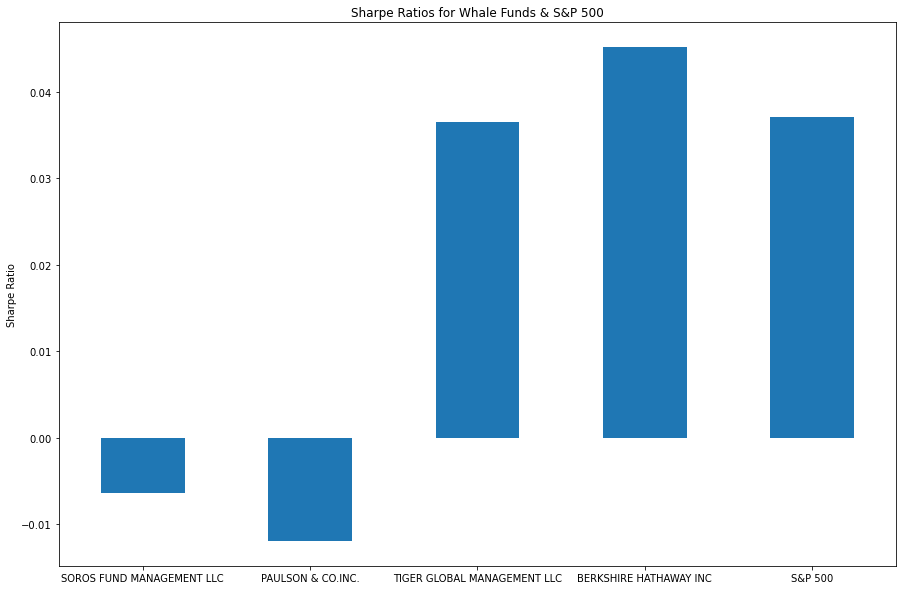

In [52]:
# Visualizes the Sharpe ratios as a bar chart
# Includes a title parameter and adjust the figure size
annualized_sharpe_ratio.plot(kind="bar", title="Sharpe Ratios for Whale Funds & S&P 500", figsize=(15,10), ylabel="Sharpe Ratio", rot=0)

#### Step 4: Answer the following question: Which of the four portfolios offers the best risk-return profile? Which offers the worst?

**Question** Which of the four portfolios offers the best risk-return profile? Which offers the worst?
    
Berkshire Hathaway Inc. offers the best risk-return profile according to its Sharpe Ratio.  Paulson & Co. Inc. offers the worst risk-return profile according to its Sharpe Ratio.

---

### Diversify the Portfolio

Your analysis is nearing completion. Now, you need to evaluate how the portfolios react relative to the broader market. Based on your analysis so far, choose two portfolios that you’re most likely to recommend as investment options.

*** Choosing Berkshire Hathaway Inc. and Tiger Global Management LLC as recommended investment options, as they have comparable Sharpe Ratios with the S&P 500***

#### Use the Pandas `var` function to calculate the variance of the S&P 500 by using a 60-day rolling window. Visualize the last five rows of the variance of the S&P 500.

In [56]:
# Calculates the variance of the S&P 500 using a rolling 60-day window.
snp_60_day_var_rolling = whale_daily_return["S&P 500"].rolling(window=60).var()

#Visualizes the last five rows of the variance of the S&P 500.
snp_60_day_var_rolling.tail()

date
2020-09-04    0.000103
2020-09-08    0.000116
2020-09-09    0.000120
2020-09-10    0.000121
2020-09-11    0.000120
Name: S&P 500, dtype: float64

#### For each of the two portfolios that you chose, complete the following steps:

1. Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

2. Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

3. Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

4. Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

##### Portfolio 1 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [98]:
# Calculates the covariance using a 60-day rolling window 
brk_rolling_60_covariance = whale_daily_return["BERKSHIRE HATHAWAY INC"].rolling(window=60).cov(whale_daily_return["S&P 500"])

# Reviews the last five rows of the covariance data
display(brk_rolling_60_covariance.tail())

date
2020-09-04    0.000021
2020-09-08    0.000023
2020-09-09    0.000024
2020-09-10    0.000024
2020-09-11    0.000024
dtype: float64

##### Portfolio 1 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [99]:
# Calculates the beta based on the 60-day rolling covariance compared to the market (S&P 500)
brk_60_day_beta = brk_rolling_60_covariance/snp_60_day_var_rolling

# Reviews the last five rows of the beta information
display(brk_60_day_beta.tail())

date
2020-09-04    0.207879
2020-09-08    0.203051
2020-09-09    0.196632
2020-09-10    0.197543
2020-09-11    0.199411
dtype: float64

##### Portfolio 1 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [100]:
# Calculates the average of the 60-day rolling beta
brk_60_day_beta_mean = brk_60_day_beta.mean()

# Displays the average of the 60-day rolling beta
print(f"Berkshire Hathaway Beta Avg.: {brk_60_day_beta_mean}")

Berkshire Hathaway Beta Avg.: 0.2214986101354593


##### Portfolio 1 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'60-Day Rolling Beta for Berkshire Hathaway'}, xlabel='date', ylabel='60-Day Rolling Beta'>

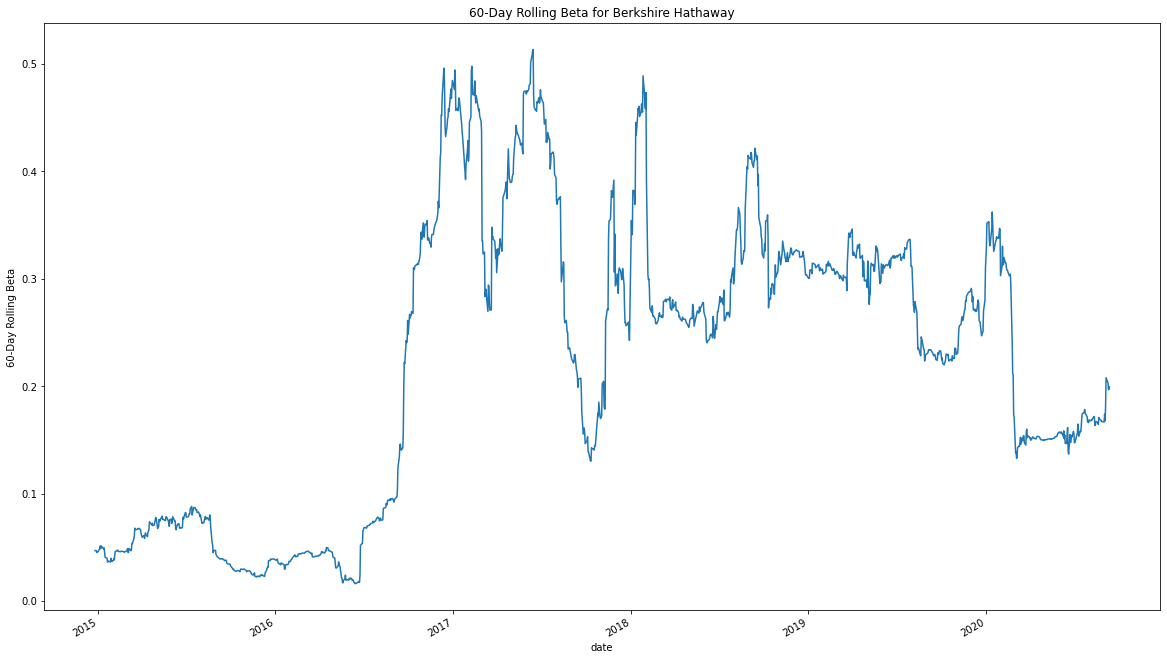

In [101]:
# Plots the rolling beta 
# Includes a title parameter and adjust the figure size
brk_60_day_beta.plot(title="60-Day Rolling Beta for Berkshire Hathaway", figsize=(20,12), ylabel="60-Day Rolling Beta")

##### Portfolio 2 - Step 1: Using the 60-day rolling window, the daily return data, and the S&P 500 returns, calculate the covariance. Review the last five rows of the covariance of the portfolio.

In [102]:
# Calculates the covariance using a 60-day rolling window 
# Reviews the last five rows of the covariance data
tgm_rolling_60_covariance = whale_daily_return["TIGER GLOBAL MANAGEMENT LLC"].rolling(window=60).cov(whale_daily_return["S&P 500"])
display(tgm_rolling_60_covariance.tail())

date
2020-09-04    0.000008
2020-09-08    0.000009
2020-09-09    0.000010
2020-09-10    0.000010
2020-09-11    0.000010
dtype: float64

##### Portfolio 2 - Step 2: Calculate the beta of the portfolio. To do that, divide the covariance of the portfolio by the variance of the S&P 500.

In [103]:
# Calculates the beta based on the 60-day rolling covariance compared to the market (S&P 500)
# Reviews the last five rows of the beta information
tgm_60_day_beta = tgm_rolling_60_covariance/snp_60_day_var_rolling
display(tgm_60_day_beta.tail())

date
2020-09-04    0.081061
2020-09-08    0.076672
2020-09-09    0.079575
2020-09-10    0.080934
2020-09-11    0.081378
dtype: float64

##### Portfolio 2 - Step 3: Use the Pandas `mean` function to calculate the average value of the 60-day rolling beta of the portfolio.

In [106]:
# Calculates the average of the 60-day rolling beta
tgm_60_day_beta_mean = tgm_60_day_beta.mean()
print(f"Tiger Global Management Beta Avg.: {tgm_60_day_beta_mean}")

Tiger Global Management Beta Avg.: 0.03093001487238774


##### Portfolio 2 - Step 4: Plot the 60-day rolling beta. Be sure to include the `title` parameter, and adjust the figure size if necessary.

<AxesSubplot:title={'center':'60-Day Rolling Beta for Tiger Global Management'}, xlabel='date', ylabel='60-Day Rolling Beta'>

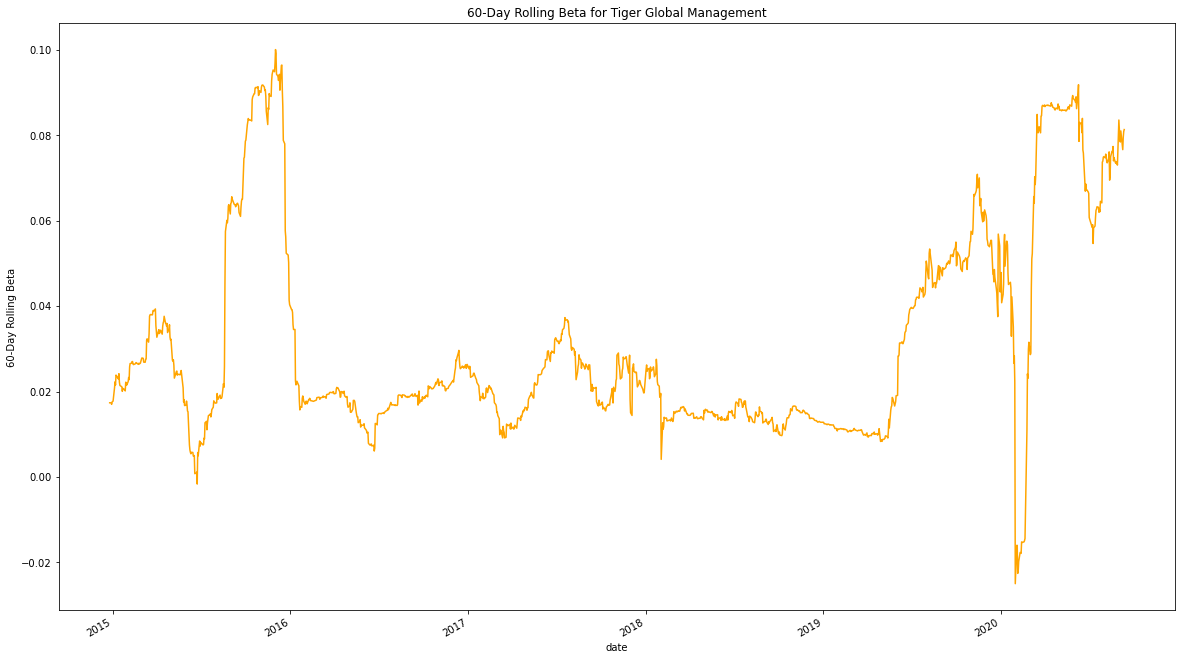

In [107]:
# Plots the rolling beta 
# Includes a title parameter and adjust the figure size
tgm_60_day_beta.plot(title="60-Day Rolling Beta for Tiger Global Management", figsize=(20,12), ylabel="60-Day Rolling Beta", color="orange")

#### Answer the following two questions:

1. Which of the two portfolios seem more sensitive to movements in the S&P 500?

2. Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?

**Question 1** Which of the two portfolios seem more sensitive to movements in the S&P 500?
    
Berkshire Hathaway seems more sensitive to movements in the S&P 500 index.  It has a higher covariance and beta than Tiger Global Management.


**Question 2** Which of the two portfolios do you recommend for inclusion in your firm’s suite of fund offerings?
    
Generally, I would recommend that the firm include Berkshire Hathaway in their suite of fund offerings;  it has a higher cumulative return and Sharpe ratio than Tiger Global within the time frame, displaying its superiority in return and risk/return.  However, if the firm decided that it desired a fund with less risk / a fund that is less sensative to movements in the S&P 500 Index, I would recommend adding Tiger Global Management, as it is superior to Berkshire in these regards. 